# Projet 4 : Anticipez les besoins en consommation électrique de bâtiments

# Analyse exploratoire

## Import des modules

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Récupération des données

In [199]:
data_2015 = pd.read_csv("data/2015-building-energy-benchmarking.csv")
data_2016 = pd.read_csv("data/2016-building-energy-benchmarking.csv")

## Exploration des données

In [200]:
def shape(dataframe):
    """Calcuates and displays the shape of the dataframe and the filling rage"""
    
    # get the numbers of rows and columns in the dataframe
    nb_rows, nb_columns = dataframe.shape
    print("DataFrame has {} rows and {} columns.".format(nb_rows,nb_columns))

    # get the number of non-Nan data in the dataframe
    nb_data = dataframe.describe(include='all').loc["count"].sum()

    # computing the filling rate by rounding down to 2 decimal places
    import math
    filling_rate = math.floor(nb_data*10000 / (nb_rows * nb_columns))/10000
    print("The global filling rate of the DataFrame is : {:.2%}".format(filling_rate))
    
    # computing the missing values
    nb_missing = int((nb_rows * nb_columns) - nb_data)
    print("There are {} missing values out of {}.".format(nb_missing, int(nb_rows * nb_columns)))

In [201]:
shape(data_2015)
shape(data_2016)

DataFrame has 3340 rows and 47 columns.
The global filling rate of the DataFrame is : 83.11%
There are 26512 missing values out of 156980.
DataFrame has 3376 rows and 46 columns.
The global filling rate of the DataFrame is : 87.15%
There are 19952 missing values out of 155296.


In [202]:
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'human_address': '{""address"": ""405 OLIVE WAY""...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'human_address': '{""address"": ""724 PINE ST"", ...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'human_address': '{""address"": ""1900 5TH AVE"",...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'human_address': '{""address"": ""620 STEWART ST...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'human_address': '{""address"": ""401 LENORA ST""...",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [203]:
data_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


Nous constatons que la plupart des lignes (correspondant à un batîment particulier) se retrouvent à la fois dans les données de 2015 et dans celles de 2016.

L'agrégation des données de 2015 et de 2016 nécessitera donc de gérer les données dupliquées.

In [204]:
print("\nNames of the {} common columns :\n".format(len(set(data_2015)&set(data_2016))), set(data_2015)&set(data_2016))
print("\nNames of the {} columns only in 2015 dataset:\n".format(len(set(data_2015)-set(data_2016))), set(data_2015)-set(data_2016))
print("\nNames of the {} columns only in 2016 dataset:\n".format(len(set(data_2016)-set(data_2015))), set(data_2016)-set(data_2015))


Names of the 37 common columns :
 {'OSEBuildingID', 'YearBuilt', 'YearsENERGYSTARCertified', 'ComplianceStatus', 'DataYear', 'ListOfAllPropertyUseTypes', 'PropertyGFATotal', 'SiteEUI(kBtu/sf)', 'CouncilDistrictCode', 'SourceEUIWN(kBtu/sf)', 'BuildingType', 'ThirdLargestPropertyUseType', 'Electricity(kWh)', 'PropertyGFAParking', 'TaxParcelIdentificationNumber', 'SiteEnergyUse(kBtu)', 'NumberofBuildings', 'PropertyName', 'SiteEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'PropertyGFABuilding(s)', 'PrimaryPropertyType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'Outlier', 'DefaultData', 'NumberofFloors', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseType', 'SiteEnergyUseWN(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'Neighborhood', 'Electricity(kBtu)', 'SourceEUI(kBtu/sf)'}

Names of the 10 columns only in 2015 dataset:
 {'Zip Codes', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Seattle Police Department Micro Community 

Nous constatons que certains colonnes spécifiques ont en fait la même sémantique. Par exemple :
* la colonne 'Comment' de 2015 correspond à la colonne 'Comments' de 2016
* la colonne 'Zip Codes' de 2015 correspond à la colonne 'ZipCode' de 2016
* la colonne 'GHGEmissionsIntensity(kgCO2e/ft2)' de 2015 correspond à la colonne 'GHGEmissionsIntensity' de 2016
* la colonne 'GHGEmissions(MetricTonsCO2e)' de 2015 correspond à la colonne 'TotalGHGEmissions' de 2016

Nous constatons aussi que certains colonnes spécifiques ont été reformatées. Ainsi, la colonne 'Location' a été séparée en plusieurs colonnes en 2016 :
* 'State'
* 'City'
* 'Address'
* 'Longitude'
* 'Latitude'

## Nettoyage

### Suppression des données non-explicatives
Nous supprimons les variables (colonnes) qui n'apportent aucun élément explicatif :

* Dans les deux tables :
    * 'DataYear' : année de collecte des données
    * 'PropertyName' : Official or common property name.
    * 'TaxParcelIdentificationNumber' : Property King County PIN
    * 'CouncilDistrictCode' : Property City of Seattle council district.
    * 'DefaultData'
    * 'ComplianceStatus' : ???


* 2015 seulement :
    * 'Comment'
    * '2010 Census Tracts' : ???
    * 'Seattle Police Department Micro Community Policing Plan Areas' :  ???
    * 'City Council Districts' : ???
    * 'SPD Beats' : ???
    * 'Zip Codes'
    * 'Location'


* 2016 seulement :
    * 'ZipCode'
    * 'Longitude'
    * 'State'
    * 'Latitude'
    * 'Comments'
    * 'Address'
    * 'City'

In [205]:
features_to_drop = [         
    'DataYear',
    'PropertyName',
    'TaxParcelIdentificationNumber',
    'CouncilDistrictCode',
    'DefaultData',
    'Comment',
    'ComplianceStatus',
    '2010 Census Tracts',
    'Seattle Police Department Micro Community Policing Plan Areas',
    'City Council Districts',
    'SPD Beats',
    'Zip Codes',
    'Location',
    'ZipCode',
    'Longitude',
    'State',
    'Latitude',
    'Comments',
    'Address',
    'City'
]

# Drop several columns
for feature in features_to_drop:
    
    # In the 2015 dataframe
    try:
        data_2015 = data_2015.drop(feature, axis=1)
    except KeyError:
        pass
    
    # In the 2016 dataframe
    try:
        data_2016 = data_2016.drop(feature, axis=1)
    except KeyError:
        pass

### Suppression des données issues des relevés de consommation annuels
Nous supprimons aussi les variables (colonnes) issues des relevés de consommation annuels (hormis ceux qui seront utilisés comme étiquette pour la régression) :

* Dans les deux tables :
    * 'SiteEUI(kBtu/sf)' : Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area.
    * 'SiteEUIWN(kBtu/sf)' : Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet).
    * 'SourceEUI(kBtu/sf)' : Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area.
    * 'SourceEUIWN(kBtu/sf)' : Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area.
    * 'SiteEnergyUseWN(kBtu)'
    * 'SteamUse(kBtu)' : The annual amount of district steam consumed by the property on-site
    * 'Electricity(kWh)' : The annual amount of electricity consumed by the property on-site, […] measured in kWh.
    * 'Electricity(kBtu)' : The annual amount of electricity consumed by the property on-site, […] measured in thousands of British thermal units (kBtu).
    * 'NaturalGas(therms)' : The annual amount of utility-supplied natural gas consumed by the property, measured in therms.
    * 'NaturalGas(kBtu)' :
    * 'OtherFuelUse(kBtu)'
    * 'Outlier'


* 2015 uniquement :
    * 'GHGEmissionsIntensity(kgCO2e/ft2)' : Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot.


* 2016 uniquement : 
    * 'GHGEmissionsIntensity', 

In [206]:
features_to_drop2 = [         
        'SiteEUI(kBtu/sf)',
        'SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)',
        'SourceEUIWN(kBtu/sf)',
        'SiteEnergyUseWN(kBtu)',
        'SteamUse(kBtu)',
        'Electricity(kWh)',
        'Electricity(kBtu)',
        'NaturalGas(therms)',
        'NaturalGas(kBtu)',
        'OtherFuelUse(kBtu)',
        'Outlier',
        'GHGEmissionsIntensity(kgCO2e/ft2)',
        'GHGEmissionsIntensity'
]

# Drop several columns
for feature in features_to_drop2:
    
    # In the 2015 dataframe
    try:
        data_2015 = data_2015.drop(feature, axis=1)
    except KeyError:
        pass
    
    # In the 2016 dataframe
    try:
        data_2016 = data_2016.drop(feature, axis=1)
    except KeyError:
        pass

In [207]:
# Renaming a column
data_2015 = data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':"TotalGHGEmissions"})

In [208]:
print("\nNames of the {} common columns :\n".format(len(set(data_2015)&set(data_2016))), set(data_2015)&set(data_2016))
print("\nNames of the {} columns only in 2015 dataset:\n".format(len(set(data_2015)-set(data_2016))), set(data_2015)-set(data_2016))
print("\nNames of the {} columns only in 2016 dataset:\n".format(len(set(data_2016)-set(data_2015))), set(data_2016)-set(data_2015))


Names of the 21 common columns :
 {'OSEBuildingID', 'YearBuilt', 'YearsENERGYSTARCertified', 'ListOfAllPropertyUseTypes', 'PropertyGFATotal', 'BuildingType', 'ThirdLargestPropertyUseType', 'PropertyGFAParking', 'SiteEnergyUse(kBtu)', 'NumberofBuildings', 'PropertyGFABuilding(s)', 'PrimaryPropertyType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'TotalGHGEmissions', 'NumberofFloors', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseType', 'Neighborhood'}

Names of the 0 columns only in 2015 dataset:
 set()

Names of the 0 columns only in 2016 dataset:
 set()


## Concaténation

In [209]:
data = pd.concat([data_2015, data_2016])
shape(data)

DataFrame has 6716 rows and 21 columns.
The global filling rate of the DataFrame is : 81.08%
There are 26684 missing values out of 141036.


## Fusion des lignes correspondant à des bâtiments dupliqués
Nous identifions les bâtiments dupliqués sur la base de l'identifiant 'OSEBuildingID'.

Nous fusionnons ensuite les lignes et supprimons les doublons.

In [210]:
def duplicates_merging(dataframe, keys):
    """This function handles duplicates rows in the dataframe, based on a subset of columns (features)."""

    # Checking if there are some duplicated rows
    duplicates_mask = dataframe.duplicated(subset=keys, keep=False)
    if True not in list(duplicates_mask.unique()):
        print("No duplicates.")
        return dataframe
    
    print("Number of duplicates rows :", len(dataframe[duplicates_mask]))
    
    # Filtering the dataframe to keep only duplicated rows
    duplicates_mask = dataframe.duplicated(subset=keys, keep=False)
    duplicates_df = dataframe[duplicates_mask]

    # Group-by subset of columns used for key, sort=False to speed-up
    gb = duplicates_df.groupby(keys, sort=False)

    # Initializing aggregated dataframe
    agg_df = pd.DataFrame()

    # Identification of numerical and non-numerical columns
    numeric_columns = list(dataframe.select_dtypes(include=[np.number]).columns.values)

    # defining aggregation function for non-numerical columns
    def agg_mode(x): m = pd.Series.mode(x); return m.values[0] if not m.empty else np.nan

    # Iterating upon columns
    for column in dataframe.columns:

        # Calculate the mean of each group for numeric columns
        if column in numeric_columns:
            agg_col = gb[column].agg('mean')

        # Calculate the mode of each group for numeric columns
        else:
            agg_col = gb[column].agg(agg_mode)
            
        # adding the aggregated column to aggregated dataframe
        agg_df = pd.concat([agg_df, agg_col], axis=1, sort=True)

    # Dropping all duplicates
    dataframe_cleaned = dataframe.drop_duplicates(subset=keys, keep=False)

    # Concatenating the dataframe without duplicates and the aggregated rows for duplicates
    result = dataframe_cleaned.append(agg_df, ignore_index=True, sort=False)

    print("Shape after handling duplicates :", result.shape)
    return result

In [211]:
dataframe = data
keys = ['OSEBuildingID']

data = duplicates_merging(dataframe, keys)
shape(data)

Number of duplicates rows : 6568
Shape after handling duplicates : (3432, 21)
DataFrame has 3432 rows and 21 columns.
The global filling rate of the DataFrame is : 81.56%
There are 13283 missing values out of 72072.


Enfin, nous éliminons l'identifiant des bâtiments qui ne nous sera plus utile.

In [212]:
# Delete the identifier of buildings
data = data.drop('OSEBuildingID', axis=1)

# *Features engineering*

## Étude du taux de remplissage des variables

In [213]:
nb_rows, nb_columns = data.shape

# Count of the values on each column
columns_count = data.count()

# Sort the Series
columns_count = columns_count.sort_values(ascending=False)

# Calculating filling rates
filling_rates = columns_count / nb_rows

# Display the filling rates
filling_rates

BuildingType                       1.000000
PrimaryPropertyType                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofFloors                     1.000000
PropertyGFATotal                   1.000000
PropertyGFAParking                 1.000000
PropertyGFABuilding(s)             1.000000
NumberofBuildings                  0.999709
SiteEnergyUse(kBtu)                0.999126
TotalGHGEmissions                  0.998834
ListOfAllPropertyUseTypes          0.993007
LargestPropertyUseType             0.991259
LargestPropertyUseTypeGFA          0.991259
ENERGYSTARScore                    0.773893
SecondLargestPropertyUseType       0.496503
SecondLargestPropertyUseTypeGFA    0.496503
ThirdLargestPropertyUseType        0.176865
ThirdLargestPropertyUseTypeGFA     0.176865
YearsENERGYSTARCertified           0.035839
dtype: float64

### Élimination des colonnes trop peu remplies
Nous décidons de ne conserver que les colonnes remplies à 75% minimum pour la modélisation.

Cela nous permet de conserver la variable ENERGYSTARScore dont nous devrons étudier la pertinence (dans la partie modélisation).

In [214]:
def fillingrate_filter_columns(dataframe, limit_rate):
    """This function drop the colums where the filling rate is less than a defined limit rate."""

    # Count of the values on each column
    columns_count = dataframe.count()

    # Number of rows in the dataframe
    nb_rows = dataframe.shape[0]
    
    # Calculating filling rates
    filling_rates = columns_count / nb_rows

    # Define a mask of features with a filling_rate bigger than the limit rate
    mask = filling_rates > limit_rate
    
    # Apply the mask to the filling_rates Series
    filling_rates_selection = filling_rates[mask]
    
    # Get the list of the name of the selected columns
    features_selection = list(filling_rates_selection.index)
    print("Number of columns with a filling rate bigger than  {:.2%} : {} columns.".format(limit_rate, len(features_selection)))

    # Return a projection on the selection of features
    return dataframe[features_selection]

In [215]:
data = fillingrate_filter_columns(data, 0.75)
shape(data)

Number of columns with a filling rate bigger than  75.00% : 15 columns.
DataFrame has 3432 rows and 15 columns.
The global filling rate of the DataFrame is : 98.31%
There are 868 missing values out of 51480.


### Étude du remplissage des lignes

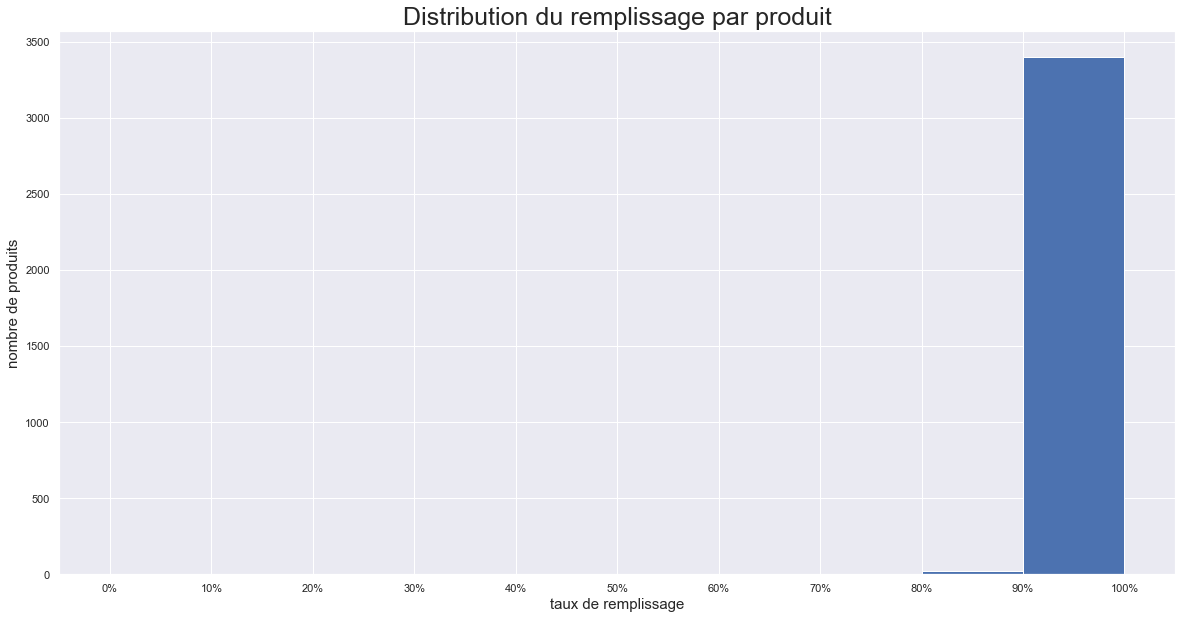

In [216]:
# Count the non-null values on each row
row_count = data.count(axis=1)

# Calculating filling rates
nb_columns = data.shape[1]
filling_rates_row = row_count / nb_columns

# Plotting histogram
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Distribution du remplissage par produit", fontsize=25)
plt.xlabel("taux de remplissage", fontsize=15)
plt.ylabel("nombre de produits", fontsize=15)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
bins = np.linspace(0, 1, num=11)
ax.hist(filling_rates_row, bins=bins)
ax.xaxis.set_major_locator(plt.MaxNLocator(11))
plt.show()

Nous constatons que la majeur partie des lignes est remplie à plus de 90%.
Nous allons faire de l'imputation pour les dernières valeurs manquantes.

In [217]:
def fillingrate_filter_rows(dataframe, limit_rate):
    """This function drop the colums where the filling rate is less than a defined limit rate."""

    # Count of the values on each rows (pd.Series)
    row_count = dataframe.count(axis=1)

    # Number of columns in the dataframe
    nb_columns = dataframe.shape[1]
    
    # Calculating filling rates for each row
    filling_rates = row_count / nb_columns

    # Define a mask of rows with a filling_rate bigger than the limit rate
    mask = filling_rates > limit_rate
    
    # Displaying result of filtering
    print("Number of rows with a filling rate bigger than  {:.2%} : {} rows.".format(limit_rate, len(dataframe[mask])))

    # Return a projection on the selection of rows
    return dataframe[mask]

## Imputation des valeurs manquantes


In [218]:
shape(data)

DataFrame has 3432 rows and 15 columns.
The global filling rate of the DataFrame is : 98.31%
There are 868 missing values out of 51480.


In [219]:
# Looking at missing values
data.describe(include='all')

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
count,3432,3432,3432,3432.000000,3431.000000,3432.000000,3.432000e+03,3432.000000,3.432000e+03,3408,3402,3.402000e+03,2656.000000,3.429000e+03,3428.000000
unique,8,27,14,NaN,NaN,NaN,NaN,NaN,NaN,474,57,NaN,NaN,NaN,NaN
top,NonResidential,Low-Rise Multifamily,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,NaN,NaN,NaN,NaN
freq,1487,1009,587,NaN,NaN,NaN,NaN,NaN,NaN,901,1691,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1968.360140,1.087875,4.688228,9.447183e+04,9651.224068,8.482061e+04,NaN,NaN,7.921153e+04,68.116717,5.398222e+06,119.311982
std,NaN,NaN,NaN,33.182901,1.992205,5.458473,2.172062e+05,32953.838541,2.048840e+05,NaN,NaN,2.011318e+05,26.377049,2.152855e+07,534.287074
min,NaN,NaN,NaN,1900.000000,0.500000,0.000000,1.128500e+04,-1.500000,-8.451000e+03,NaN,NaN,6.455000e+03,1.000000,0.000000e+00,0.090000
25%,NaN,NaN,NaN,1948.000000,1.000000,2.000000,2.846350e+04,0.000000,2.726825e+04,NaN,NaN,2.505300e+04,52.500000,9.293272e+05,9.568750
50%,NaN,NaN,NaN,1974.000000,1.000000,4.000000,4.419500e+04,0.000000,4.213725e+04,NaN,NaN,3.986750e+04,75.500000,1.792235e+06,33.842500
75%,NaN,NaN,NaN,1997.000000,1.000000,5.000000,9.044875e+04,2890.250000,8.192375e+04,NaN,NaN,7.557300e+04,89.625000,4.195498e+06,91.890000


### Imputation multivariée de la variable 'ENERGYSTARScore'
La variable 'ENERGYSTARScore' est celle qui, parmi les variables conservées, possède le plus mauvais taux de remplissage.

Nous allons donc faire une imputation multivariée à l'aide de l'imputeur itératif de scikit-learn.

In [220]:
# Load libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Selection of numeric columns
numeric_columns = list(data.select_dtypes(include=['number']).columns)

# Selection of columns to apply the imputer, avoiding data leaks
numeric_columns.remove('SiteEnergyUse(kBtu)')
numeric_columns.remove('TotalGHGEmissions')
columns_to_impute = numeric_columns

# Create iterative imputer
imp = IterativeImputer(max_iter=10, random_state=0)

# Train and apply (inplace) the iterative imputer
data[columns_to_impute] = imp.fit_transform(data[columns_to_impute])

# Checking the effects of the iterative imputer
shape(data)

DataFrame has 3432 rows and 15 columns.
The global filling rate of the DataFrame is : 99.88%
There are 61 missing values out of 51480.


### Imputation des autres valeurs manquantes
Nous allons regarder plus en détail à quoi correspondent les dernières valeurs manquantes.

In [225]:
# Display rows with missing data
mask = data.isnull().any(axis=1)
data[mask].head()

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
36,SPS-District K-12,K-12 School,NORTHWEST,1953.0,1.000000,1.0,110830.0,0.0,110830.0,K-12 School,110830.000000,67.676080,NaN,NaN
65,Multifamily LR (1-4),Low-Rise Multifamily,MAGNOLIA / QUEEN ANNE,1957.0,0.705243,4.0,23636.0,0.0,23636.0,Low-Rise Multifamily,18758.287287,67.396583,NaN,NaN
120,Multifamily LR (1-4),Low-Rise Multifamily,EAST,2015.0,1.000000,4.0,36685.0,8254.0,28431.0,Low-Rise Multifamily,25186.251336,67.813506,820220.125,NaN
900,Multifamily LR (1-4),Low-Rise Multifamily,NORTHEAST,1977.0,1.000000,3.0,33166.0,0.0,33166.0,Low-Rise Multifamily,27778.915621,67.433917,NaN,NaN


Pour les autres lignes, nous constatons que les valeurs manquantes correspondent aux variables 'LargestPropertyUseType' et 'LargestPropertyUseTypeGFA'.
Nous allons imputer :
* la variable 'LargestPropertyUseType' avec la variable 'ListOfAllPropertyUseTypes'
* la variable 'LargestPropertyUseTypeGFA' avec la variable 'PropertyGFATotal'

In [222]:
# Imputation of missing values
data['LargestPropertyUseType'].fillna(value=data['ListOfAllPropertyUseTypes'], axis=0, inplace=True)
data['LargestPropertyUseType'].fillna(value=data['PrimaryPropertyType'], axis=0, inplace=True)
data['LargestPropertyUseTypeGFA'].fillna(value=data['PropertyGFATotal'], axis=0, inplace=True)

# Dropping a linearly dependant feature
data = data.drop('ListOfAllPropertyUseTypes', axis=1)

In [223]:
# Display rows with missing data
mask = data.isnull().any(axis=1)
data[mask]

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
36,SPS-District K-12,K-12 School,NORTHWEST,1953.0,1.000000,1.0,110830.0,0.0,110830.0,K-12 School,110830.000000,67.676080,NaN,NaN
65,Multifamily LR (1-4),Low-Rise Multifamily,MAGNOLIA / QUEEN ANNE,1957.0,0.705243,4.0,23636.0,0.0,23636.0,Low-Rise Multifamily,18758.287287,67.396583,NaN,NaN
120,Multifamily LR (1-4),Low-Rise Multifamily,EAST,2015.0,1.000000,4.0,36685.0,8254.0,28431.0,Low-Rise Multifamily,25186.251336,67.813506,820220.125,NaN
900,Multifamily LR (1-4),Low-Rise Multifamily,NORTHEAST,1977.0,1.000000,3.0,33166.0,0.0,33166.0,Low-Rise Multifamily,27778.915621,67.433917,NaN,NaN


Nous constatons que les dernières valeurs manquantes correspondent aux étiquettes (valeurs cibles) : total d'énergie consommée et total des émissions de gaz à effet de serre.

Nous allons donc conserver ces lignes telles quelles, dans le but d'appliquer à ces batîments le modèle d'apprentissage automatique.

### Corrélations entre variables catégorielles

### Retypage des variables catégorielles

In [66]:
data.dtypes

BuildingType                  object
PrimaryPropertyType           object
Neighborhood                  object
YearBuilt                      int64
NumberofBuildings            float64
NumberofFloors               float64
PropertyGFATotal             float64
PropertyGFAParking           float64
PropertyGFABuilding(s)       float64
LargestPropertyUseType        object
LargestPropertyUseTypeGFA    float64
SiteEnergyUse(kBtu)          float64
TotalGHGEmissions            float64
dtype: object

In [67]:
# Select columns of object dtypes
obj_columns = list(data.select_dtypes(include='object').columns)
print("Columns of object dtypes:\n", obj_columns)

Columns of object dtypes:
 ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType']


In [230]:
# Convert object dtypes features as categorical data ('category' dtypes)
data[obj_columns] = data[obj_columns].astype('category')

# Check dtypes
data.dtypes

BuildingType                 category
PrimaryPropertyType          category
Neighborhood                 category
YearBuilt                     float64
NumberofBuildings             float64
NumberofFloors                float64
PropertyGFATotal              float64
PropertyGFAParking            float64
PropertyGFABuilding(s)        float64
LargestPropertyUseType       category
LargestPropertyUseTypeGFA     float64
ENERGYSTARScore               float64
SiteEnergyUse(kBtu)           float64
TotalGHGEmissions             float64
dtype: object

# Visualisation des données (par t-SNE)

In [231]:
mask = data['SiteEnergyUse(kBtu)'] < 1
data[mask]

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
209,SPS-District K-12,K-12 School,SOUTHWEST,1948.0,1.0,2.0,53352.0,0.0,53352.0,K-12 School,59460.0,67.436091,0.0,4.19


Une valeur pose problème lors du passage au logarithme, nous allons l'écarter pour la t-SNE.

In [232]:
data_tsne = data.drop(209)

### Selection des variables pour la t-SNE

In [233]:
# Selecting all the numeric columns
subset = list(data.select_dtypes(include=['number']).columns)

# Keeping only the required columns in the dataframe
X = data_tsne[subset]

# Dropping rows with missing values (not handled by t-SNE implementation)
X = X.dropna(subset=subset)

# Transforming with logarithm of the target for coloring t-SNE
y = np.log(X['SiteEnergyUse(kBtu)'])

### Pré-traitement pour la t-SNE

In [234]:
# Centering and reducting (except last column: 'nutrition_grade_fr')
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler().fit(X)
X_std = std_scaler.transform(X)

### Exécution de la t-SNE

In [235]:
# Import libraries
from sklearn import manifold

# Instanciation of t-SNE
tsne = manifold.TSNE(n_components=2,
                     perplexity=30,
                     n_iter=300,
                     init='pca', # initialisation by a PCA
                     random_state=0
                    )

# Applying the t-SNE
X_projected = tsne.fit_transform(X_std) # t-SNE do not have ".transform" method

### Visualisation de la t-SNE en 2D
Nous procédons à une visualisation des données, en fonction de leur note Nutri-Score ('nutrition_grade_fr'), par t-SNE.

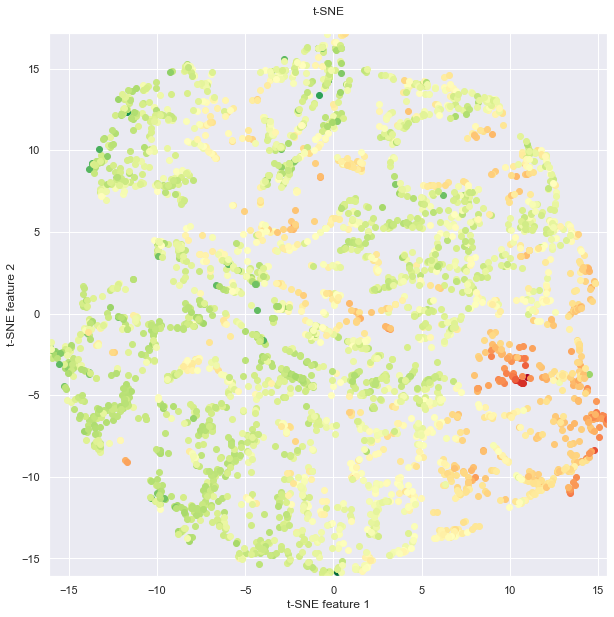

In [236]:
# Graphical representation of the population
plt.figure(figsize=(10,10))

# Definitions of axis boundaries
plt.xlim(X_projected[:,0].min(), X_projected[:,0].max())
plt.ylim(X_projected[:,1].min(), X_projected[:,1].max())

# Definition of axis'labels
plt.title("t-SNE\n")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")

# Mapping colors
y = (y - y.min()) / (y.max() - y.min())

# Glyphes and colors are representing 'Nutri-Score grades'
for i in range(len(X_projected)):
    plt.scatter(X_projected[:,0][i], # x-coordinate
             X_projected[:,1][i], # y-coordinate
             # y.iloc[i,0], # labels
             color=plt.cm.RdYlGn_r(y.iloc[i])
    )

# Sauvegarde du pd.DataFrame (méthode *feather*)

In [237]:
data.head()

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,Multifamily LR (1-4),Low-Rise Multifamily,DOWNTOWN,1900.0,1.0,4.0,48383.0,0.0,48383.0,Multifamily Housing,38172.000000,75.0,2953338.0,112.06
1,Multifamily LR (1-4),Low-Rise Multifamily,DELRIDGE,2007.0,1.0,4.0,52134.0,0.0,52134.0,Multifamily Housing,52134.000000,85.0,1212551.0,8.45
2,NonResidential,Retail Store,DOWNTOWN,1989.0,1.0,4.0,111077.0,0.0,111077.0,Retail Store,101528.658703,91.0,9898724.0,69.01
3,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,1906.0,1.0,6.0,98370.0,25920.0,72450.0,Office,98370.000000,45.0,6525887.0,47.24
4,NonResidential,Large Office,LAKE UNION,1947.0,1.0,4.0,193788.0,37854.0,155934.0,Office,138672.000000,59.0,16760217.0,116.84


In [241]:
# feather does not support serializing a non-default index
data = data.reset_index()

# Deleting index
data = data.drop(columns=["index"])

# Save the file (binary)
data.to_feather("p4_data4.ft")

In [242]:
data.head()

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,Multifamily LR (1-4),Low-Rise Multifamily,DOWNTOWN,1900.0,1.0,4.0,48383.0,0.0,48383.0,Multifamily Housing,38172.000000,75.0,2953338.0,112.06
1,Multifamily LR (1-4),Low-Rise Multifamily,DELRIDGE,2007.0,1.0,4.0,52134.0,0.0,52134.0,Multifamily Housing,52134.000000,85.0,1212551.0,8.45
2,NonResidential,Retail Store,DOWNTOWN,1989.0,1.0,4.0,111077.0,0.0,111077.0,Retail Store,101528.658703,91.0,9898724.0,69.01
3,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,1906.0,1.0,6.0,98370.0,25920.0,72450.0,Office,98370.000000,45.0,6525887.0,47.24
4,NonResidential,Large Office,LAKE UNION,1947.0,1.0,4.0,193788.0,37854.0,155934.0,Office,138672.000000,59.0,16760217.0,116.84
